# STUDENT INTERVENTION

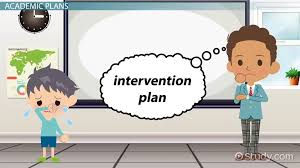

In [1]:
from IPython.display import Image
Image(filename="intervention.jpg", width=1000, height=800)

# 1. Business Problem
## 1.1 Context
These dataset have been collected from two portugal schools which consists of student achievement in secondary education. The data was collected by using school reports and questionnaires.

## 1.2 Problems with current approach
Nowadays,teachers are not much interacting with students due to which they don't know the prons and cons of students.Many of the students cannot recognize their weaknesses and this stops them from developing their skills.Proper student intervention procedure does not take place in many of the schools.They lag behind in academics and even their parents would not be able to help them if the time crosses.

## 1.3 Problem Statement
Many of the schools have hired us as data science consultants.If the students are made to understand their weaknesses,then,they can surely work on it and could improve themselves.We need to identify students who might need early intervention before they fail to graduate.

## 1.4 Business Objectives and Constraints
* Deliverable: Trained model file
* Model interprtability is very important
* Ouput Probabilities along with the prediction
* No latency constraints

# 2. Machine Learning Problem
## 2.1 Data Overview

For this project:
1. The dataset has 395 observations.
2. Each observation includes the student's status.

**Target variable**<br>
'passed' – Current student status (Passed/Failed)

**Features**

Student information
* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
* gender - student's gender (binary: 'F' - female or 'M' - male) 
* age - student's age (numeric: from 15 to 22) 
* address - student's home address type (binary: 'U' - urban or 'R' - rural) 
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
* failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
* schoolsup - extra educational support (binary: yes or no) 
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
* activities - extra-curricular activities (binary: yes or no) 
* nursery - attended nursery school (binary: yes or no) 
* higher - wants to take higher education (binary: yes or no) 
* romantic - with a romantic relationship (binary: yes or no)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
* goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
* health - current health status (numeric: from 1 - very bad to 5 - very good) 
* absences - number of school absences (numeric: from 0 to 93) 

Family information

* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
* guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
* famsup - family educational support (binary: yes or no) 
* internet - Internet access at home (binary: yes or no) 
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 

Distance information
*  traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

## 2.2 Mapping Business problem to ML problem
### 2.2.1 Type of Machine Learning Problem
This should be a classification problem.
This is because there possibly two discrete outcomes, typical of a classification problem:
* Students who need early intervention.
* Students who do not need early intervention.

We can classify accordingly with a binary outcome such as:
* Yes, 1, for students who need early intervention.
* No, 0, for students who do not need early intervention.
Evidently, we are not trying to predict a continuous outcome, hence this is not a regression problem.

### 2.2.2 Evaluation Metric (KPI)
Since this is binary classification problem, we use the following metrics:
* **Confusion matrix** - For getting a better clarity of the no of correct/incorrect predictions by the model
* **ROC-AUC** - It considers the rank of the output probabilities and intuitively measures the likelihood that model can distinguish between a positive point and a negative point. (**Note:** ROC-AUC is typically used for binary classification only). We will use AUC to select the best model.

# 3. Exploratory Data Analysis
Importing the libraries

In [2]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function to perform data standardization 
from sklearn.preprocessing import StandardScaler

# Libraries to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  ## to plot feature importance

# Evaluation metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

# To save the final model on disk
from sklearn.externals import joblib

In [3]:
# Set printing options.
np.set_printoptions(precision=2, suppress=True)
# These options determine the way floating point numbers, arrays and other NumPy objects are displayed.

## 3.1 Reading the data

In [4]:
df = pd.read_csv("student-data.csv")

In [5]:
# Dataframe dimensions
df.shape

(395, 31)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
# Columns of the dataframe
df.columns

Index(['school', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [8]:
# First 5 rows
df.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [9]:
# Column datatypes
df.dtypes

school        object
gender        object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [10]:
df.dtypes[df.dtypes=='object']

school        object
gender        object
address       object
famsize       object
Pstatus       object
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
passed        object
dtype: object

In [11]:
pd.set_option('display.max_columns', 100) ## display max 100 columns
df.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


In [12]:
# Last 5 rows
df.tail()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,no


In [13]:
# Calculate number of students
n_students = df.shape[0]

# Calculate number of features
n_features = df.shape[1] - 1

# Calculate passing students
# Data filtering using .loc[rows, columns]
passed = df.loc[df.passed == 'yes', 'passed']
n_passed = passed.shape[0]

# Calculate failing students
failed = df.loc[df.passed == 'no', 'passed']
n_failed = failed.shape[0]

# Calculate graduation rate
total = float(n_passed + n_failed)
grad_rate = float(n_passed * 100 / total)

print("Total no.of students =",n_students)
print("No.of features =",n_features)
print("No.of students who passed =",n_passed)
print("No.of students who failed =",n_failed)
print("Graduation rate of the class =",grad_rate)

Total no.of students = 395
No.of features = 30
No.of students who passed = 265
No.of students who failed = 130
Graduation rate of the class = 67.0886075949367


## 3.2.Distribution of Numeric Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B2A6BE0>,
      dtype=object)

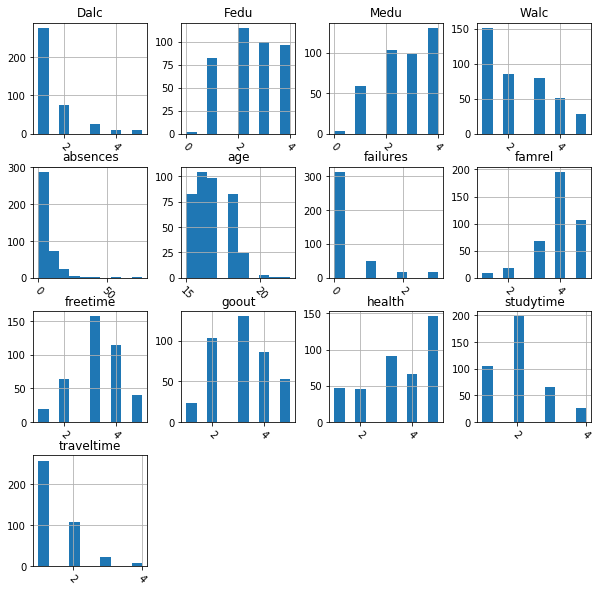

In [14]:
# Plot histogram grid
df.hist(figsize=(10,10), xrot=-45)

**Observations:**
We can make out quite a few observations:

Let us look at all the plotted numeric features.

Consider the histogram for alcohol consumption(DALC and WALC):

Workdays:
* Above 200 students consumes less amount of alcohol during workdays and very less number of students consumes very high amount of alcohol.

Weekend:
* As compared to DALC,most of the students consumes alcohol at the weekend.

Consider the histogram for Father's and Mother's education(Fedu and Medu):

* We can notice that most of the parents are somewhat educated.

Absences:

* Almost above 290 out of 300 students were present everyday.Very few students never attended school.This can be selected as an important feature considering the fact that those students who were absent almost everyday have a very less chance of passing the final exam.

Failures:

* Few students have failed in the past exams.This can also be a very good feature which we can consider while doing predictions.

Famrel:

* Some students have very bad family relationships which can affect them mentally which could ultimately lead to their failures.

Free time and Go out:

* Above 150 students have normal free time after school and the same range of students go out with their friends.

Health:

* Almost 45-50 students have very bad health which can affect them physically and may lead to failures.

Study time:

* 200 students studies only 2 hours per week which is a very less time.

Travel time:

* Most of the students take a very less time to go from home to school and vice-versa.

In [15]:
# Summarize numerical features
# Generates descriptive statistics.
# Summarizes the central tendency(the tendency for the values of a random variable to cluster round its mean, mode, or median.)
# Summarizes dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


* Just scan over the min, max and mean rows and make sure the values make sense.
* There are no indicator variables since no features have std deviation as 0.
* The minimum and maximum values of all the features looks reasonable.

## 3.3 Distribution of categorical features

In [16]:
# Summarize categorical features
df.describe(include=['object'])

,school,gender,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no,yes
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263,265


* There are many categorical features as compared to numeric features.
* Most of the features are binary.
* Only 3 features are nominal.

Let's check the frequency of features having nominal values.

In [17]:
df['Mjob'].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [18]:
df['Fjob'].value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

In [19]:
df['reason'].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

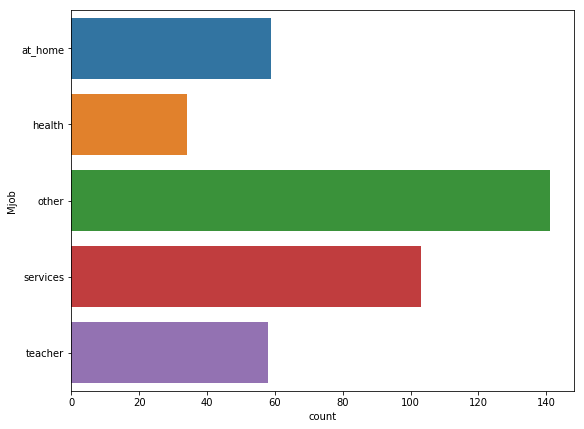

In [20]:
## We can also use bar plots instead
plt.figure(figsize=(9,7))
sns.countplot(y='Mjob', data=df)

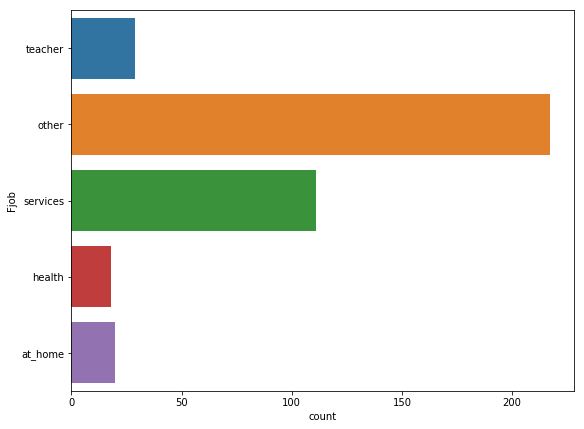

In [21]:
## We can also use bar plots instead
plt.figure(figsize=(9,7))
sns.countplot(y='Fjob', data=df)

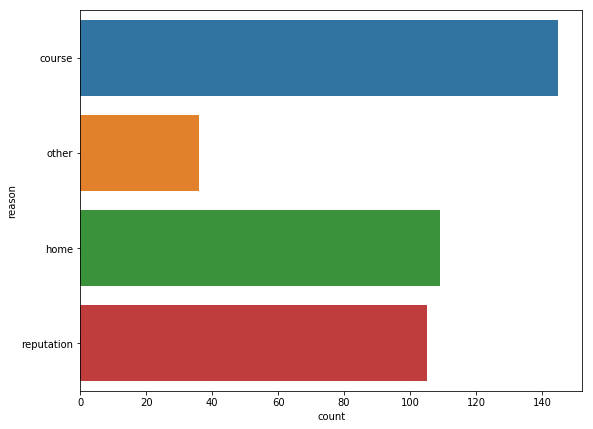

In [22]:
## We can also use bar plots instead
plt.figure(figsize=(9,7))
sns.countplot(y='reason', data=df)

In [23]:
df['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

Approx 67.08% of students have passed and 32.91% of students have failed.

This means the dataset is **not balanced**

## 3.4 Segmentations
Segment the target variable (status) with key features

### Univariate segmentations

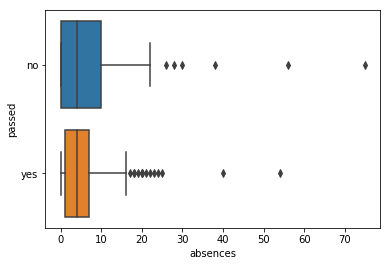

In [24]:
## passed vs absences
sns.boxplot(y='passed', x='absences', data=df)

The students who remained less absent passed in the exam .Here,we can see that also the students who failed remained present in the class.This don't make much sense.So,lets check the next feature.

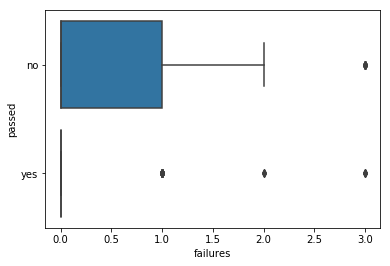

In [25]:
## passed vs failures
sns.boxplot(y='passed', x='failures', data=df)

* This makes intuitive sense as the students who never failed in the exam passed the final exam.
* The students who failed previously also failed in the final exam.

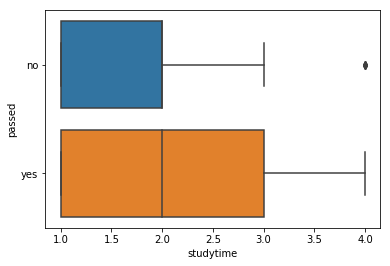

In [26]:
## passed vs studytime
sns.boxplot(y='passed', x='studytime', data=df)

* This,too makes sense because the students who studied only 2 hours per week failed in the exam.
* The students who studied ranging from 1 our to 3 hours passed the exam. Let us assume that the students who studied only 1-2 hours has more grasping power.

### Bivariate segmentations

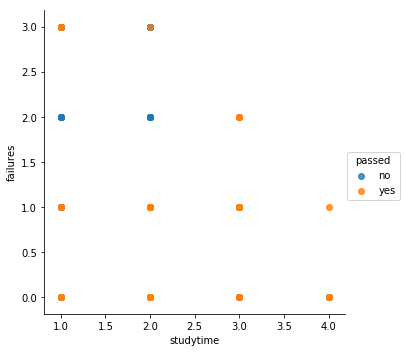

In [27]:
# Scatterplot of studytime vs. failures
sns.lmplot(x='studytime', y='failures', hue='passed', data=df, fit_reg=False)

* This is a **bivariate segmentation** because we are plotting the relationship between two variables while segmenting classes using color.
* It's a quick way to see if there are potential interactions between different features.

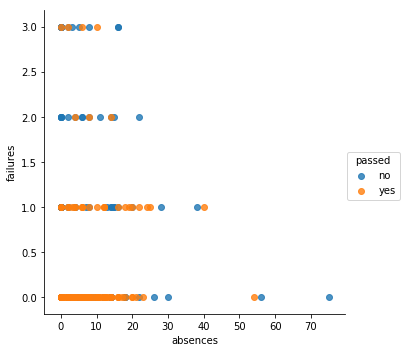

In [28]:
# Scatterplot of absences vs. failures
sns.lmplot(x='absences', y='failures', hue='passed', data=df, fit_reg=False)

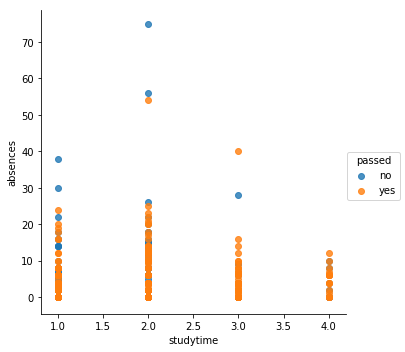

In [29]:
# Scatterplot of studytime vs. absences
sns.lmplot(x='studytime', y='absences', hue='passed', data=df, fit_reg=False)

## 3.6 Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [30]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908


#### A lot of numbers make things difficult to read. So let's visualize this.
But first, it's important to notice that the correlations for 'basement' all show as NaN. This is expected because right now that feature doesn't vary at all (its standard deviation is 0), as we saw all the way back in step 2. We'll fix this later.

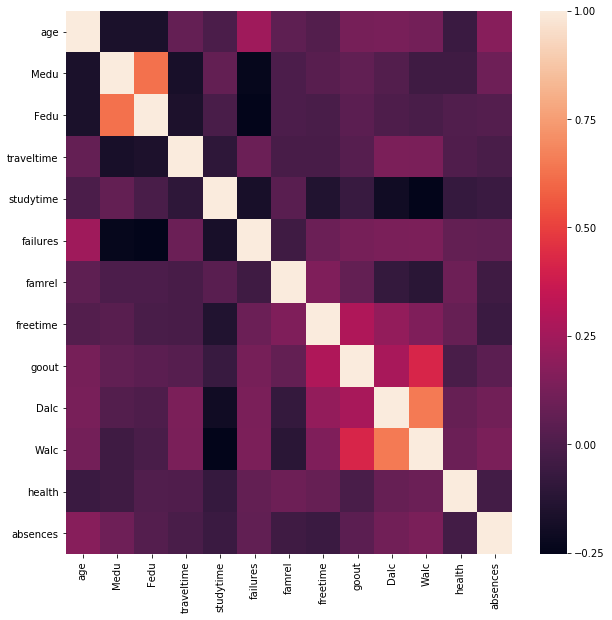

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

**What to look for?**
* The colorbar on the right explains the meaning of the heatmap - Dark colors indicate **strong negative correlations** and light colors indicate **strong positive correlations**.
* Perhaps the most helpful way to interpret this correlation heatmap is to first find features that are correlated with our target variable by scanning the first column.
* In this case, it doesn't look like many features are strongly correlated with the target variable.

# 4. Data Cleaning
## 4.1 De-duplication and dropping unwanted observations

In [32]:
print(df.shape)

(395, 31)


In [33]:
# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(395, 31)


There are no duplicates.

## 4.2 Outliers
An eye test for all the previous analysis tells us that it doesn't look like outliers will be a huge problem.

## 4.3 Missing Data

In [34]:
# Display number of missing values by feature
df.isnull().sum()

school        0
gender        0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

There are no missing values.

# 5. Feature Engineering
* Our datset is small and contains sparse data.
* A common problem in machine learning is sparse data, which alters the performance of machine learning algorithms and their ability to calculate accurate predictions. 
* Data is considered sparse when certain expected values in a dataset are missing, which is a common phenomenon in general large scaled data analysis.But,we don't have missing value.Hence,it will not be a huge problem.
* We won't always have a lot of domain knowledge for the problem. In these situations, we should rely on exploratory analysis to provide us hints better feature engineering.

## 5.1 Identify feature and target columns

* It is often the case that the data you obtain contains non-numeric features. 
* This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

In [35]:
# Columns
df.columns

Index(['school', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [36]:
# We want to get the column name "passed" which is the last 
df.columns[-1]

'passed'

In [37]:
# This would get everything except for the last element that is "passed"
df.columns[:-1]

Index(['school', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

In [38]:
# Extract feature columns
# As seen above, we're getting all the columns except "passed" here but we're converting it to a list
feature_cols = list(df.columns[:-1])

In [39]:
# Extract target column 'passed'
# As seen above, since "passed" is last in the list, we're extracting using [-1]
target_col = df.columns[-1]

In [40]:
# Show the list of columns
print("Feature columns =",feature_cols)
print("\nTarget column =",target_col)

Feature columns = ['school', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column = passed


In [41]:
# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = df[feature_cols]
Y_all = df[target_col]

In [42]:
# Show the feature information by printing the first five rows
X_all.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4


In [43]:
# Show the target information by printing the first five rows
Y_all.head()

0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object

** Finally convert 'passed' (target variable) into a binary indicator variable.**
* 'Failed' should be 1
* 'Passed' should be 0

In [44]:
# Convert passed to an indicator variable
df['passed'] = pd.get_dummies( df.passed ).no

To confirm we did that correctly, display the proportion of students in our dataset who failed.

In [45]:
# The proportion of observations who 'failed'
df.passed.mean()

0.3291139240506329

Matches with the earlier count. Seems good

## 5.2 One-Hot Encoding for categorical variables

In [46]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['school', 'gender', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

# Display first 10 rows
df.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,passed,school_GP,school_MS,gender_F,gender_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,1,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,2,5,10,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,1,3,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,1,1,6,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,1,1,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,1,5,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0


**Save this dataframe as your analytical base table to use for future use.**
* Remember to set the argument index=None to save only the data.

In [47]:
# Save analytical base table
df.to_csv('Student_new_DB.csv', index=None)

# 6. Machine Learning Models
## 6.1 Data Preparation

In [48]:
print(df.shape)

(395, 57)


In [49]:
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,passed,school_GP,school_MS,gender_F,gender_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,1,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,2,5,10,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,1,3,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,1,1,6,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,1,1,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,1,5,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0


### 6.1.1 Train test split

In [50]:
# Create separate object for target variable
y = df.passed

# Create separate object for input features
X = df.drop('passed', axis=1)

In [51]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.passed)

In [52]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(316, 56) (79, 56) (316,) (79,)


### 6.1.2 Data standardization
* In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
* Thus we use **mean** and **standard deviation** of each feature.
* It is very important to save the **mean** and **standard deviation** for each of the feature from the **training set**, because we use the same mean and standard deviation in the test set.

In [53]:
train_mean = X_train.mean()
train_std = X_train.std()

In [54]:
## Save these mean and std dev values
train_mean.to_pickle("train_mean.pkl")
train_std.to_pickle("train_std.pkl")

In [55]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [56]:
## Check for mean and std dev.
X_train.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,gender_F,gender_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
count,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02
mean,7.768048e-16,1.234947e-16,1.377239e-16,-1.935864e-16,-2.810691e-17,-2.775558e-17,-5.832184e-17,2.216933e-16,1.032929e-16,-1.254271e-16,1.725062e-16,7.448332e-17,6.324055e-18,-2.564756e-17,2.564756e-17,-1.573987e-16,1.271838e-16,1.405346e-17,-1.405346e-17,-6.605124e-17,1.960457e-16,4.461972e-17,-9.591484e-17,-4.391705e-17,-2.164232e-16,4.918710e-17,-7.694267e-17,1.686415e-17,1.089143e-17,3.513364e-17,-1.616147e-16,-1.461559e-16,8.537475e-17,1.746142e-16,-7.448332e-17,-5.726783e-17,-9.275281e-17,1.166437e-16,2.726370e-16,-4.497106e-17,-1.236704e-16,8.396940e-17,-1.068063e-16,1.068063e-16,5.410581e-17,-5.410581e-17,-5.621382e-18,-7.588866e-17,-1.826949e-17,1.826949e-17,1.674118e-16,2.239770e-16,-6.710525e-17,9.029345e-17,2.508542e-16,1.433453e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.347226e+00,-2.523913e+00,-2.331024e+00,-6.684354e-01,-1.203119e+00,-4.470874e-01,-3.345420e+00,-2.223901e+00,-1.867714e+00,-5.216208e-01,-9.809816e-01,-1.860973e+00,-6.761081e-01,-2.622626e+00,-3.800907e-01,-1.098163e+00,-9.077300e-01,-5.472302e-01,-1.821602e+00,-1.594519e+00,-6.251638e-01,-3.691315e-01,-2.700489e+00,-4.431099e-01,-2.926410e-01,-7.194356e-01,-5.910316e-01,-4.277147e-01,-2.380678e-01,-2.149672e-01,-1.084241e+00,-6.202770e-01,-2.989506e-01,-7.970501e-01,-6.202770e-01,-3.113110e-01,-5.667064e-01,-5.129957e-01,-1.534349e+00,-3.113110e-01,-2.700489e+00,-3.691315e-01,-7.864790e-01,-1.267466e+00,-1.126655e+00,-8.847743e-01,-1.011136e+00,-9.858573e-01,-4.783780e-01,-2.083782e+00,-2.305744e-01,-4.323270e+00,-4.583242e-01,-2.174957e+00,-1.446167e+00,-6.892947e-01
25%,-5.499912e-01,-6.777173e-01,-5.054885e-01,-6.684354e-01,-1.203119e+00,-4.470874e-01,7.209958e-02,-2.387239e-01,-9.638891e-01,-5.216208e-01,-9.809816e-01,-4.178627e-01,-6.761081e-01,3.800907e-01,-3.800907e-01,-1.098163e+00,-9.077300e-01,-5.472302e-01,5.472302e-01,-1.594519e+00,-6.251638e-01,-3.691315e-01,3.691315e-01,-4.431099e-01,-2.926410e-01,-7.194356e-01,-5.910316e

In [57]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [58]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,gender_F,gender_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,7.900000e+01,7.900000e+01,79.000000,79.000000,79.000000,79.000000
mean,0.025229,0.070109,-0.147314,-0.165987,0.193562,0.056429,0.043260,-0.025129,0.191634,0.285559,0.306557,-0.089053,0.007512,0.152036,-0.152036,-0.209476,0.209476,-0.097452,0.097452,-0.077267,0.077267,-0.252564,0.252564,-0.204512,0.128762,0.159875,0.014415,-0.113475,-0.070020,0.030710,0.082428,0.028194,-0.160973,-0.226803,-0.028194,0.044473,0.257594,0.233180,-0.124407,-0.133419,-0.135996,0.135996,0.045499,-0.045499,-0.184593,0.184593,-0.151670,0.151670,0.235135,-0.235135,8.502341e-17,2.775558e-16,-0.091665,0.091665,-0.121640,0.121640
std,1.090252,1.056388,0.963078,0.936994,1.023989,1.102082,1.109200,0.962493,1.022732,1.302715,1.159935,1.019108,0.720793,0.800554,0.800554,1.002784,1.002784,0.934994,0.934994,1.038955,1.038955,0.590461,0.590461,0.770104,1.182747,1.044793,1.012621,0.881972,0.851227,1.070610,0.994470,1.018327,0.698908,0.923752,0.990268,1.066687,1.119587,1.136797,1.051385,0.775217,1.145427,1.145427,1.014733,1.014733,1.010112,1.010112,0.995088,0.995088,1.155831,1.155831,1.004796e+00,1.004796e+00,0.917460,0.917460,1.043013,1.043013
min,-1.347226,-2.523913,-2.331024,-0.668435,-1.203119,-0.447087,-3.345420,-2.223901,-1.867714,-0.521621,-0.980982,-1.860973,-0.676108,-2.622626,-0.380091,-1.098163,-0.907730,-0.547230,-1.821602,-1.594519,-0.625164,-0.369132,-2.700489,-0.443110,-0.292641,-0.719436,-0.591032,-0.427715,-0.238068,-0.214967,-1.084241,-0.620277,-0.298951,-0.797050,-0.620277,-0.311311,-0.566706,-0.512996,-1.534349,-0.311311,-2.700489,-0.369132,-0.786479,-1.267466,-1.126655,-0.884774,-1.011136,-0.985857,-0.478378,-2.083782,-2.305744e-01,-4.323270e+00,-0.458324,-2.174957,-1.446167,-0.689295
25%,-0.549991,-0.677717,-0.505488,-0.668435,-0.003795,-0.447087,0.072100,-0.238724,-0.963889,-0.521621,-0.980982,-0.417863,-0.438719,0.380091,-0.380091,-1.098163,-0.907730,-0.547230,0.547230,-1.594519,-0.625164,-0.369132,0.369132,-0.443110,-0.292641,-0.719436,-0.591032,-0.427715,-0.238068,-0.214967,-1.084241,-0.620277,-0.298951,-0.797050,-0.620277,-0.311311,-0.566706,-0.512996,-1.534349,-0.311311,0.369132,-0.369132,-0.786479,-1.267466,-1.126655,-0.884774,-1.011136,-0.985857,-0.478378,-2.083782,-2.305744e-01,2.305744e-01,-0.458324,0.458324,-1.446167,-0.689295
50%,0.247244,0.245380,-0.505488,-0.668435,-0.003795,-0.447087,0.072100,-0.238724,-0.060064,-0.521621,0.633551,-0.417863,-0.201330,0.380091,-0.380091,-1.098163,1.098163,-0.547230,0.547230,0.625164,-0.625164,-0.369132,0.369132,-0.443110,-0.292641,-0.719436,-0.591032,-0.427715,-0.238068,-0.214967,0.919386,-0.620277,-0.298951,-0.797050,-0.620277,-0.311311,-0.566706,-0.512996,0.649680,-0.311311,0.369132,-0.369132,-0.786479,0.786479,-1.126655,1.126655,-1.011136,1.011136,-0.478378,0.478378,-2.305744e-01,2.305744e-01,-0.458324,0.458324,0.689295,-0.689295
75%,1.044479,1.168478,0.407279,0.749186,-0.003795,-0.447087,1.211273

## 6.2 Model-1 Logistic Regression

In [59]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [60]:
model.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
## Predict Train set results
y_train_pred = model.predict(X_train)

In [62]:
## Predict Test set results
y_pred = model.predict(X_test)

In [63]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [64]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.31, 0.27, 0.55, 0.27, 0.65, 0.87, 0.39, 0.36, 0.29, 0.61])

**Note:**
* The probality values represent the probability of a data point belonging to class 1 ('Failed')

In [65]:
confusion_matrix(y_test, y_pred).T

array([[48, 17],
       [ 5,  9]], dtype=int64)

In [66]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

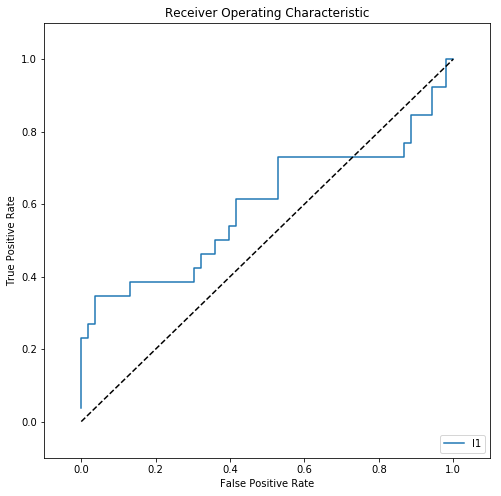

In [67]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
# Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred))

0.6423258345428157


In [69]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.5957910014513788


#### Feature Importance

In [70]:
## Building the model again with the best hyperparameters
model = LogisticRegression(C=10, penalty = 'l2')
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
indices = np.argsort(-abs(model.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
goout
failures
health
age
Walc
Mjob_services
Mjob_other
Medu
freetime
studytime
famsup_no
famsup_yes
Dalc
gender_F
gender_M
higher_yes
higher_no
paid_no
paid_yes
Fjob_health
schoolsup_no
schoolsup_yes
Mjob_teacher
traveltime
Fjob_teacher
Pstatus_T
Pstatus_A
guardian_father
Fjob_at_home
activities_no
activities_yes
address_R
address_U
famsize_LE3
famsize_GT3
Mjob_at_home
reason_course
Mjob_health
nursery_yes
nursery_no
guardian_other
romantic_no
romantic_yes
reason_home
absences
Fjob_other
reason_other
school_MS
school_GP
Fedu
guardian_mother
internet_no
internet_yes
famrel
Fjob_services
reason_reputation


## 6.3 Model-2 Random Forest

In [72]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=15, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [73]:
model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
y_train_pred = model.predict(X_train)

In [75]:
y_pred = model.predict(X_test)

In [76]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [77]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.35, 0.4 , 0.57, 0.38, 0.54, 0.55, 0.4 , 0.3 , 0.28, 0.47])

**Note:** Just as above, we can use these probabilities for model interpretation

In [78]:
confusion_matrix(y_test, y_pred).T

array([[48, 19],
       [ 5,  7]], dtype=int64)

In [79]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

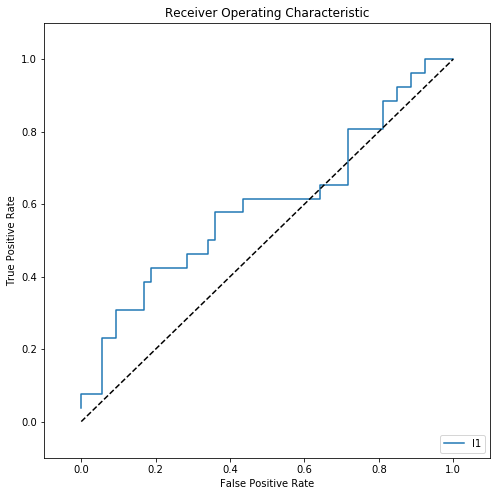

In [80]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
# Calculate AUC for Train set
roc_auc_score(y_train, y_train_pred)

0.9903846153846154

In [82]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.5957910014513789


#### Feature Importance

In [83]:
## Building the model again with the best hyperparameters
model = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=2)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
absences
failures
goout
age
health
Medu
freetime
Fedu
Walc
studytime
famrel
Mjob_other
gender_F
gender_M
Dalc
romantic_no
traveltime
schoolsup_no
activities_yes
famsup_yes
activities_no
paid_no
paid_yes
Fjob_other
romantic_yes
famsup_no
guardian_mother
guardian_other
higher_yes
reason_course
reason_reputation
Mjob_at_home
famsize_GT3
Fjob_services
schoolsup_yes
reason_home
guardian_father
higher_no
address_R
famsize_LE3
Mjob_services
address_U
internet_no
nursery_yes
internet_yes
school_GP
Mjob_teacher
Pstatus_T
school_MS
nursery_no
Mjob_health
Fjob_at_home
Pstatus_A
reason_other
Fjob_health
Fjob_teacher


## 6.4 Model-3 XGBoost

In [85]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=15, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [86]:
model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [87]:
y_train_pred = model.predict(X_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [88]:
y_pred = model.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [89]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [90]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.24, 0.23, 0.64, 0.27, 0.6 , 0.58, 0.35, 0.38, 0.3 , 0.67],
      dtype=float32)

**Note:** Just as above we can use these probabilities to get model interpretation

In [91]:
confusion_matrix(y_test, y_pred).T

array([[49, 17],
       [ 4,  9]], dtype=int64)

In [92]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

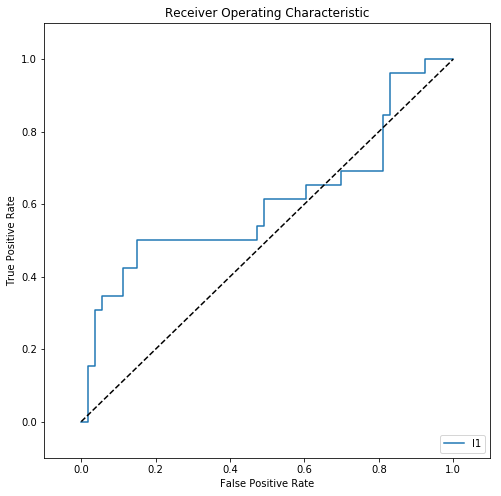

In [93]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [94]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.6544811320754718

In [95]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.6066763425253991


# 7. Save the winning model to disk

In [96]:
win_model = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=2)
win_model.fit(X_train, y_train)
joblib.dump(win_model, 'rfc_stud_intervention.pkl') 

['rfc_stud_intervention.pkl']